In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from importlib import reload
import src.data
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.visualization)
reload(src.atack)

from src.data import load_data_with_attributes
from src.visualization import draw_graph_after_failure
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack, high_load_capacity_ratio_and_degree_node_attack

In [4]:
#G(n, p)
n = 4941
p = 0.0005403026973346214
G = nx.erdos_renyi_graph(n, p)
#nx.draw(G, node_size= 3)

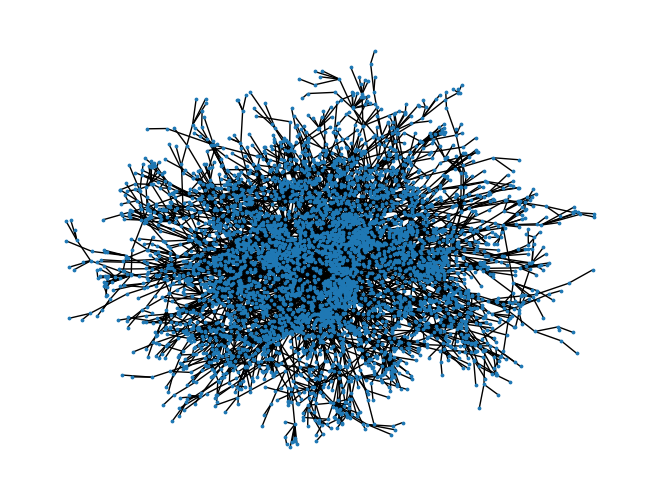

In [24]:
#power_law
n=4941
m=1
p=0.0
G = nx.powerlaw_cluster_graph(n, m, p, seed=None, create_using=None)
nx.draw(G, node_size= 3)

In [5]:
#lognormal

n = 4941
mu = 0.8020674655391538
sigma = 0.5882423588404345

degree_sequence = np.random.lognormal(mean=mu, sigma=sigma, size=n).astype(int)
degree_sequence[degree_sequence < 1] = 1

G = nx.configuration_model(degree_sequence)
G = nx.Graph(G)
G.remove_edges_from(nx.selfloop_edges(G))

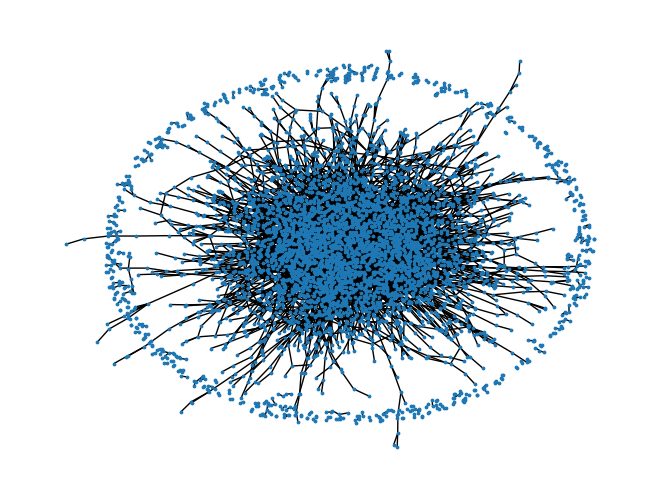

In [6]:
nx.draw(G, node_size=3)

In [17]:
def load_data_with_attributes(G):
    

    nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
    for _, row in nodes.iterrows():
        n = row["index"]

        node_attrs = {}

        if {"pos_x", "pos_y"}.issubset(nodes.columns):
            node_attrs["pos"] = [row["pos_x"], row["pos_y"]]

        for col in nodes.columns:
            if col not in ["index", "pos_x", "pos_y"]:
                node_attrs[col] = row[col]

        G.add_node(n, **node_attrs)

    #print(f"Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
    return G 

In [16]:
loaded_G = load_data_with_attributes(G)
attacked_nodes = random_node_attack(loaded_G, 4)
G_after_failure = cascade_failure_equal_load_distribution(loaded_G, attacked_nodes)
# draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
# print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
# print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))

KeyError: 'failed'